In [ ]:
#Importo las librerías que usaré parael desarrollo de la red neuronal
import numpy as np
import pandas as pd
import pandas as pnd
import tensorflow as tf
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers.core import Dense
import matplotlib.pyplot as plt

**Cargo la base de datos que voy a utilizar**

In [ ]:
stc = pnd.read_excel('BD_COMPLETA.xlsx',parse_dates=True)
stc.shape

(53, 95)

In [ ]:
stc.head()

,MAXspe1,MINspe1,MODsp1,MEsp1,MEDesp1,MAXspe2,MINspe2,MODsp2,MEsp2,MEDesp2,...,P1,P2,P3,P4,P5,P6,P7,P8,RES,STC
0,0.43,0.00,0.06,0.147333,0.120,1.77,0.59,1.44,1.159333,1.15,...,3,1,3,1,1,1,1,1,1.500,0
1,1.48,1.36,1.46,1.438667,1.450,0.92,0.49,0.87,0.814667,0.82,...,1,1,1,1,1,1,1,1,1.000,0
2,2.10,0.04,0.22,0.570667,0.295,1.55,0.01,0.01,0.583667,0.38,...,3,1,3,3,2,2,2,2,2.250,0
3,0.75,0.24,0.61,0.564667,0.600,2.20,0.00,0.00,0.843667,0.48,...,1,1,2,1,2,1,2,1,1.375,0
4,1.07,0.41,0.88,0.868333,0.915,1.53,0.88,1.16,1.168333,1.14,...,1,1,1,1,1,1,1,1,1.000,0


**Reviso la columna Objetivo**

In [ ]:
stcres = pd.DataFrame(stc, columns=["RES"])
stcdiag = pd.DataFrame(stc, columns=["STC"])

**Desarrollo la Normalización**

In [ ]:
#Normalización
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#Procedo a normalizar las variables de entrada anteriores teniendo:

stc_n = scaler.fit_transform(stc)
stcres_n = scaler.fit_transform(stcres)
stcdiag_n = scaler.fit_transform(stcdiag)

In [ ]:
stc_n = pd.DataFrame(stc_n)
stcres_n = pd.DataFrame(stc_n,columns=[93])
stcdiag_n = stcdiag

In [ ]:
# Filtro de valores no nulos por medio de la función dropna
stc_n = stc_n.dropna()
stcres_n = stcres_n.dropna()
stcdiag = stcdiag.dropna()
#Desarrollo de la ventana 80% entrenamiento y 20% validacion
size = int(len(stc_n) * 0.80)
size2 = int(len(stcres_n) * 0.80)
size3 = int(len(stcdiag) * 0.80)
#Validación de las entradas y salidas de la red
Xtrain, Xtest = stc_n[0:size], stc_n[size:len(stc_n)]
Ytrain, Ytest = stcres_n[0:size2], stcres_n[size2:len(stcres_n)]
Ztrain, Ztest = stcdiag[0:size3], stcdiag[size3:len(stcdiag)]

In [ ]:
type(stc_n)

pandas.core.frame.DataFrame

In [ ]:
type(stcres_n)

pandas.core.frame.DataFrame

**Desarrollo de la Red Neuronal Artificial**(Primer Arquitectura)

In [ ]:
#Definición de las tres capas que componen la red neuronal a desarrollar
capaEntrada = tf.keras.layers.Dense(units=95,input_shape=[95])
capaOculta = tf.keras.layers.Dense(units=95)
capaSalida = tf.keras.layers.Dense(units=1)

#Desarrollo del modelo
modelo = tf.keras.Sequential([capaEntrada,capaOculta,capaSalida])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error',
    metrics=['binary_accuracy']
)

#Se forma un movimiento aleatorio de los datos
stc_n = shuffle(Xtrain)
stcres_n = shuffle(Ytrain)

#Se comienza con el Entrenamiento de la ANN y el Ajuste del Modelo
print('En esta parte se inicia el entrenamiento de la ANN')
historial = modelo.fit(stc_n,stcres_n, epochs=1000)#, verbose=False)
print('Modelo Entrenado')

# Se evalua el modelo
scores = modelo.evaluate(stc_n, stcres_n)
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

#Se realiza las  predicciones posibles, pasando las entradas:
print (modelo.predict(Xtest).round())


En esta parte se inicia el entrenamiento de la ANN
Epoch 1/1000
2/2 [==============================] - 0s 3ms/step - loss: 5065.6670 - binary_accuracy: 0.0714
Epoch 2/1000
2/2 [==============================] - 0s 4ms/step - loss: 130067.8203 - binary_accuracy: 0.0000e+00
Epoch 3/1000
2/2 [==============================] - 0s 2ms/step - loss: 12301.8887 - binary_accuracy: 0.1667
Epoch 4/1000
2/2 [==============================] - 0s 2ms/step - loss: 14155.7295 - binary_accuracy: 0.0238
Epoch 5/1000
2/2 [==============================] - 0s 2ms/step - loss: 14242.6875 - binary_accuracy: 0.1667
Epoch 6/1000
2/2 [==============================] - 0s 2ms/step - loss: 16425.6348 - binary_accuracy: 0.0238
Epoch 7/1000
2/2 [==============================] - 0s 2ms/step - loss: 7915.1719 - binary_accuracy: 0.1905
Epoch 8/1000
2/2 [==============================] - 0s 2ms/step - loss: 693.7720 - binary_accuracy: 0.1905
Epoch 9/1000
2/2 [==============================] - 0s 2ms/step - loss: 811.

**Se muestra la gráfica de Magnitud de Pérdida**

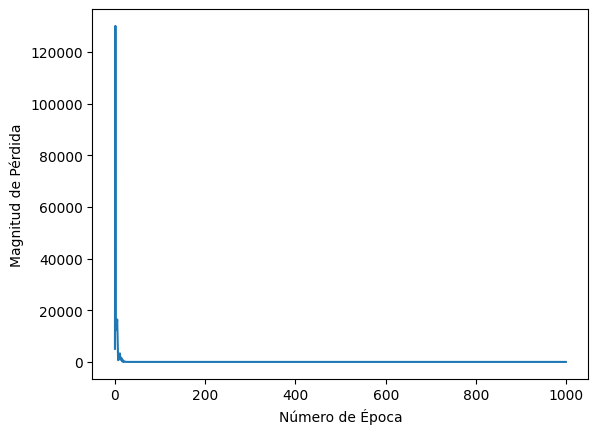

In [ ]:
plt.xlabel('Número de Época')
plt.ylabel('Magnitud de Pérdida')
plt.plot(historial.history['loss'])
plt.show()

In [ ]:
print("Variables Internas del Modelo")
print(capaEntrada.get_weights())
print("------------------------")
print(capaOculta.get_weights())
print("------------------------")
print(capaSalida.get_weights())

Variables Internas del Modelo
[array([[ 0.1107814 ,  0.04320283, -0.20564872, ..., -0.10231294,
         0.08998437, -0.03641234],
       [-0.02298451, -0.0623502 , -0.13974465, ..., -0.01376467,
        -0.23734318, -0.02235895],
       [ 0.03923275, -0.10289343, -0.0321421 , ..., -0.0287564 ,
        -0.16388912,  0.00400787],
       ...,
       [ 0.00492358, -0.0205395 ,  0.05499269, ..., -0.07820436,
        -0.05512663,  0.21740317],
       [ 0.04204469,  0.03448386,  0.17770576, ...,  0.1122026 ,
         0.24540102,  0.02958699],
       [ 0.4484875 ,  0.09518534,  0.32068884, ...,  0.4570736 ,
         0.5411941 ,  0.09223252]], dtype=float32), array([-1.11523271e-02, -1.68682560e-02, -7.92135224e-02,  4.98501882e-02,
       -7.66935758e-03, -6.18101545e-02,  9.73485112e-02,  4.58378792e-02,
        3.11045032e-02,  1.97633021e-02, -6.06660768e-02, -6.41811118e-02,
       -6.86113313e-02,  8.55195429e-03, -2.92018410e-02,  7.20339864e-02,
       -5.41696399e-02,  4.51339856e-02,

In [ ]:
type(len(stcdiag))

int

**Arquitectura de Red Neuronal Artificial Más Robusta**

In [ ]:
stcres_n.size

42

In [ ]:
type(stcres.iloc[:,0])
stcresN = stcres_n.to_numpy()
print(stcresN)
stcresN.size

[[0.3125]
 [0.875 ]
 [0.4375]
 [0.8125]
 [1.    ]
 [0.    ]
 [0.    ]
 [0.1875]
 [0.125 ]
 [0.3125]
 [0.0625]
 [0.5   ]
 [0.1875]
 [0.625 ]
 [0.1875]
 [0.4375]
 [0.    ]
 [0.125 ]
 [0.125 ]
 [0.3125]
 [0.375 ]
 [0.8125]
 [0.0625]
 [0.    ]
 [0.4375]
 [0.125 ]
 [0.25  ]
 [0.3125]
 [0.3125]
 [0.5   ]
 [0.375 ]
 [0.    ]
 [0.    ]
 [0.3125]
 [0.125 ]
 [0.    ]
 [0.125 ]
 [0.0625]
 [0.1875]
 [0.125 ]
 [0.25  ]
 [0.    ]]


42

In [ ]:
i=0
ana_res = []
for i in range(32):
  if stcresN[i] < 0.5:
    ana_res.append(0)
  else:
    ana_res.append(1)
  i = 1+i
ana_res = ana_res
ana_resDF = pd.DataFrame(ana_res,columns=['RES'])


In [ ]:
import tensorflow as tf
import tensorflow.keras as kr

In [ ]:
# Se explora la tasa de aprendizaje y el número de neuronas por capa
lr = 0.01         # learning rate
nn = [95, 95,8, 1]  # número de neuronas por capa.

# Creamos el objeto que contendrá a nuestra red neuronal, como
# secuencia de capas.
model = kr.Sequential()

# Añadimos la capa 1-Las neuronas que adquieren los datos de entrada
capaEntrada = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Añadimos la capa 2-Las nueronas de la capa Oculta
capaOculta = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Añadimos la capa 3-La neurona de Salida
capaSalida = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.Adam(lr), metrics=['binary_accuracy'])

# Y entrenamos al modelo. Los callbacks
model.fit(stc,stcdiag, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9057 - binary_accuracy: 0.0943
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9057 - binary_accuracy: 0.0943
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9057 - binary_accuracy: 0.0943
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9057 - binary_accuracy: 0.0943
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9057 - binary_accuracy: 0.0943
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9057 - binary_accuracy: 0.0943
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9057 - binary_accuracy: 0.0943
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9057 - binary_accuracy: 0.0943
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9057 - binary_accuracy: 0.0943
Epoch 10/100
2/2 [==============================] - 0s 2ms/step 